### K- Nearest Neighbors (KNN)

### 1. Import necessary Laibraries
We import necessary libraries like (pandas, Numpy, and Scikit_learn)

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

### 2. Loadd and Explore Data
We load our dataset into a pandas DataFrame.

We explore the data to understand its structure, missing value, and summary statistics¶

In [18]:
KNN = pd.read_csv(r"C:\Users\sonic\Downloads\WineQT.csv")

In [19]:
KNN.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [20]:
KNN.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [21]:
KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [22]:
KNN.shape

(1143, 13)

In [23]:
KNN.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### We creat a missing values chart
insull().sum() it will be show Zero its means nothing is missing

In [24]:
sns.heatmap(KNN.isnull())   

<Axes: >

# Data Cleaning and Label Creation
Convert quality into binary classification:

In [27]:
KNN['quality_label'] = KNN['quality'].apply(lambda x: 1 if x >= 7 else 0)
KNN = KNN.drop(['quality', 'Id'], axis=1)

# Visualize Good vs Bad Wine Count

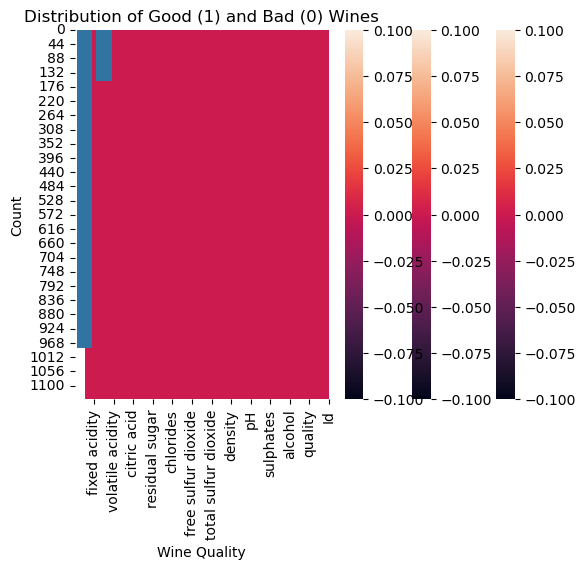

In [29]:
sns.countplot(x='quality_label', data=KNN)
plt.title('Distribution of Good (1) and Bad (0) Wines')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap (EDA)

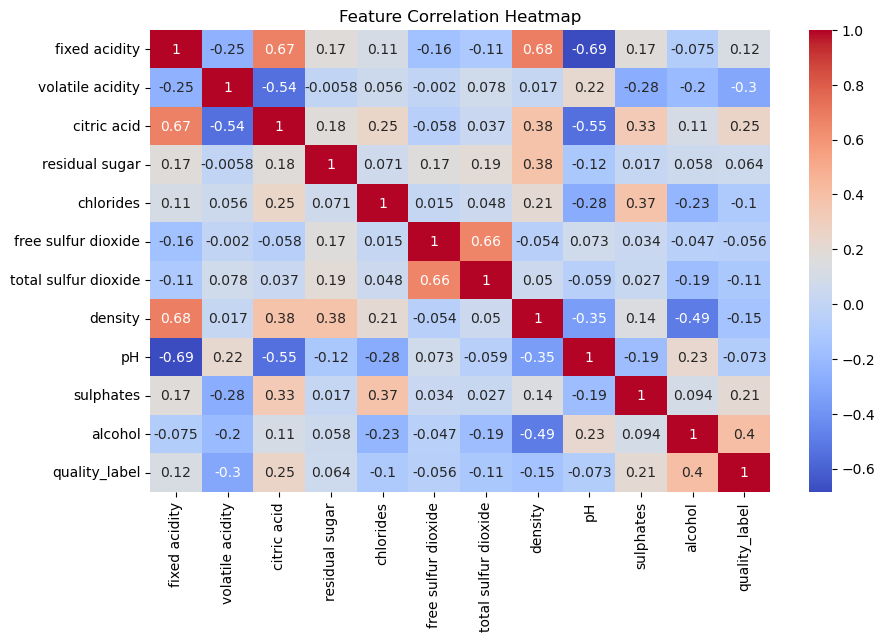

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(KNN.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# Split Data into Train and Test Sets

In [32]:
X = KNN.drop('quality_label', axis=1)
y = KNN['quality_label']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the Features

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Train the KNN Classifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

# Make Predictions and Evaluate

In [36]:
y_pred = knn.predict(X_test_scaled)

## Confusion Matrix
## Classification Report


In [38]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[192   9]
 [ 20   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       201
           1       0.47      0.29      0.36        28

    accuracy                           0.87       229
   macro avg       0.69      0.62      0.64       229
weighted avg       0.85      0.87      0.86       229



# Visualize Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

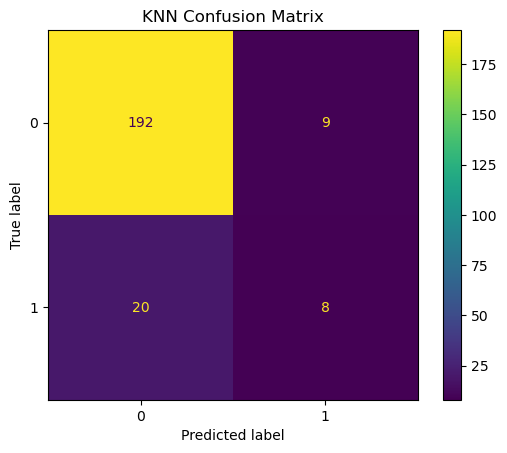

In [42]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title("KNN Confusion Matrix")
plt.show()


# Boxplot of Key Features vs Quality
Alcohol:

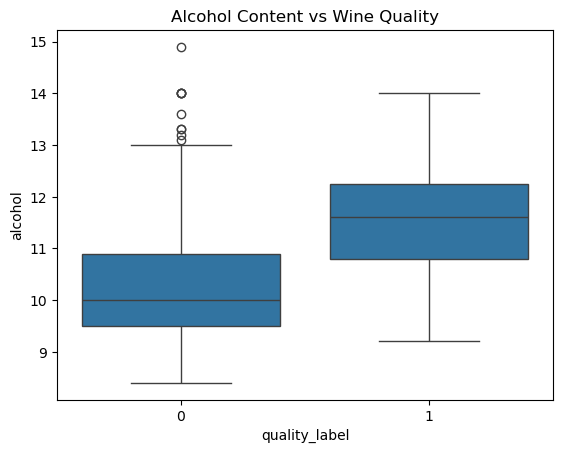

In [44]:
sns.boxplot(x='quality_label', y='alcohol', data=KNN)
plt.title('Alcohol Content vs Wine Quality')
plt.show()


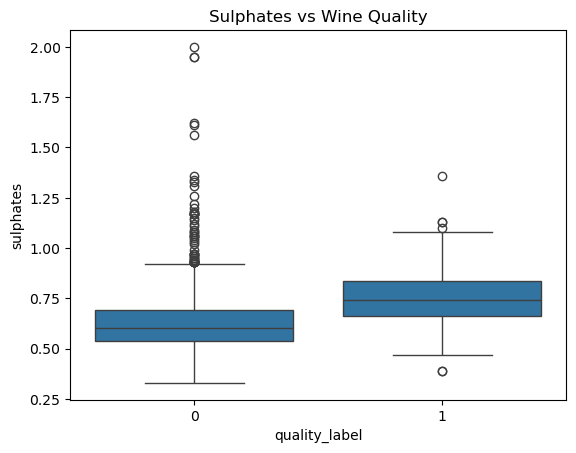

In [45]:
sns.boxplot(x='quality_label', y='sulphates', data=KNN)
plt.title('Sulphates vs Wine Quality')
plt.show()


## KNN can classify wine as good or bad based on features.

### Alcohol and sulphates are strong indicators.

### Accuracy depends on choosing the right number of neighbors and scaling the features.